# Calc Simple moving average
#### Source: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

In [1]:
# requirement
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get stock information of Tesla, TSLA

tsla = yf.Ticker("TSLA")
hist = tsla.history(period="max")
hist.info


<bound method DataFrame.info of               Open    High     Low   Close    Volume  Dividends  Stock Splits
Date                                                                         
2010-06-29   19.00   25.00   17.54   23.89  18766300          0             0
2010-06-30   25.79   30.42   23.30   23.83  17187100          0             0
2010-07-01   25.00   25.92   20.27   21.96   8218800          0             0
2010-07-02   23.00   23.10   18.71   19.20   5139800          0             0
2010-07-06   20.00   20.00   15.83   16.11   6866900          0             0
...            ...     ...     ...     ...       ...        ...           ...
2020-06-01  858.00  899.00  854.10  898.10  14939500          0             0
2020-06-02  894.70  908.66  871.00  881.56  13565600          0             0
2020-06-03  888.12  897.94  880.10  882.96   7949500          0             0
2020-06-04  889.88  895.75  858.44  864.38   8887700          0             0
2020-06-05  877.84  886.52  866.

In [6]:
# new df: sma, with 4 columns opening, high, low and closing stock value
sma = hist.iloc[:,0:4]

# only data of 2020-01-01 to current
sma_2019 = sma.loc['2019-01-01':]

In [52]:
# 1, 3, 10 days simple moving average (SMA), with closing value

sma_2019['sma_1'] = sma_2019.iloc[:, 3].rolling(window=1).mean()
sma_2019['sma_3'] = sma_2019.iloc[:, 3].rolling(window=3).mean()
sma_2019['sma_10'] = sma_2019.iloc[:, 3].rolling(window=10).mean()
print(sma_2019.shape)
sma_2019.head(10)


(360, 8)


,Open,High,Low,Close,sma_1,sma_3,sma_10,sma3_1
Date,,,,,,,,
2019-01-02,306.10,315.13,298.80,310.12,310.12,NaN,NaN,NaN
2019-01-03,307.00,309.40,297.38,300.36,300.36,NaN,NaN,NaN
2019-01-04,306.00,318.00,302.73,317.69,317.69,309.390000,NaN,-8.300000
2019-01-07,321.72,336.74,317.75,334.96,334.96,317.670000,NaN,-17.290000
2019-01-08,341.96,344.01,327.02,335.35,335.35,329.333333,NaN,-6.016667
2019-01-09,335.50,343.50,331.47,338.53,338.53,336.280000,NaN,-2.250000
2019-01-10,334.40,345.39,331.79,344.97,344.97,339.616667,NaN,-5.353333
2019-01-11,342.09,348.41,338.77,347.26,347.26,343.586667,NaN,-3.673333
2019-01-14,342.38,342.50,334.00,334.40,334.40,342.210000,NaN,7.810000


In [74]:
sma_2019['sma3_10'] = sma_2019['sma_3'] - sma_2019['sma_10']
sma_2019.head(50)

,Open,High,Low,Close,sma_1,sma_3,sma_10,sma3_10
Date,,,,,,,,
2019-01-02,306.10,315.13,298.80,310.12,310.12,NaN,NaN,NaN
2019-01-03,307.00,309.40,297.38,300.36,300.36,NaN,NaN,NaN
2019-01-04,306.00,318.00,302.73,317.69,317.69,309.390000,NaN,NaN
2019-01-07,321.72,336.74,317.75,334.96,334.96,317.670000,NaN,NaN
2019-01-08,341.96,344.01,327.02,335.35,335.35,329.333333,NaN,NaN
2019-01-09,335.50,343.50,331.47,338.53,338.53,336.280000,NaN,NaN
2019-01-10,334.40,345.39,331.79,344.97,344.97,339.616667,NaN,NaN
2019-01-11,342.09,348.41,338.77,347.26,347.26,343.586667,NaN,NaN
2019-01-14,342.38,342.50,334.00,334.40,334.40,342.210000,NaN,NaN


In [89]:
test = []
for row in sma_2019['sma3_10']:
    if row > 0:
        test.append('up')
    elif row < 0:
        test.append('down')
    else:
        test.append('NaN')
sma_2019['sma3_10_bi'] = test

sma_2019.head(50)

,Open,High,Low,Close,sma_1,sma_3,sma_10,sma3_10,sma3_10_bi
Date,,,,,,,,,
2019-01-02,306.10,315.13,298.80,310.12,310.12,NaN,NaN,NaN,NaN
2019-01-03,307.00,309.40,297.38,300.36,300.36,NaN,NaN,NaN,NaN
2019-01-04,306.00,318.00,302.73,317.69,317.69,309.390000,NaN,NaN,NaN
2019-01-07,321.72,336.74,317.75,334.96,334.96,317.670000,NaN,NaN,NaN
2019-01-08,341.96,344.01,327.02,335.35,335.35,329.333333,NaN,NaN,NaN
2019-01-09,335.50,343.50,331.47,338.53,338.53,336.280000,NaN,NaN,NaN
2019-01-10,334.40,345.39,331.79,344.97,344.97,339.616667,NaN,NaN,NaN
2019-01-11,342.09,348.41,338.77,347.26,347.26,343.586667,NaN,NaN,NaN
2019-01-14,342.38,342.50,334.00,334.40,334.40,342.210000,NaN,NaN,NaN


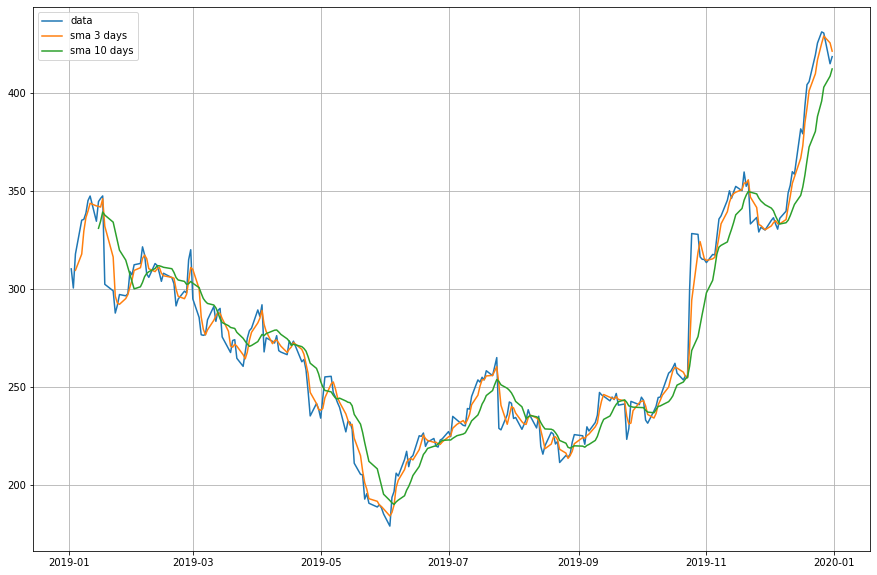

In [124]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(sma_2019['Close'],label='data')
plt.plot(sma_2019['sma_3'],label='sma 3 days')
plt.plot(sma_2019['sma_10'],label='sma 10 days')
plt.legend(loc=2)